# Аналитика в Яндекс.Афише

### Шаг 1. Загрузите данные и подготовьте их к анализу

In [2]:
# Импорт необходимых библиотек
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
costs = pd.read_csv('costs.csv')
orders = pd.read_csv('orders_log.csv')
visits = pd.read_csv('visits_log.csv')

In [4]:
# Просмотрел вид и формат массивов данных
print(costs.info())
display(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [5]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [6]:
# Просмотрел вид и формат массивов данных и привел заголовки таблицы к нижнему регистру
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
print(orders.info())
display(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [7]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [8]:
# Просмотрел вид и формат массивов данных и привел заголовки таблицы к нижнему регистру
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
print(visits.info())
display(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null object
source_id    359400 non-null int64
start_ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [9]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


### Описание данных:

### Вывод

Пустых значений нет. Для дальнейшего анализа и визуализации данных необходимо было привести значения в удобный для анализа формат данных.

# Шаг 2. Постройте отчёты и посчитайте метрики

### Продукт

Сколько людей пользуются в день, неделю, месяц?

In [10]:
visits['day']=visits['start_ts'].astype('datetime64[D]')
visits['week']=visits['start_ts'].astype('datetime64[W]')
visits['month']=visits['start_ts'].astype('datetime64[M]')

In [11]:
# Посчитаем DAU, WAU и MAU
DAU=visits.groupby('day')['uid'].nunique().reset_index()
WAU=visits.groupby('week')['uid'].nunique().reset_index()
MAU=visits.groupby('month')['uid'].nunique().reset_index()

In [12]:
visits.head()

,device,end_ts,source_id,start_ts,uid,day,week,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01


In [13]:
# Привел значения MAU в более удобный формат для анализа
MAU['month']=MAU['month'].dt.date

Text(0.5, 1.0, 'Количество посетителей в месяц')

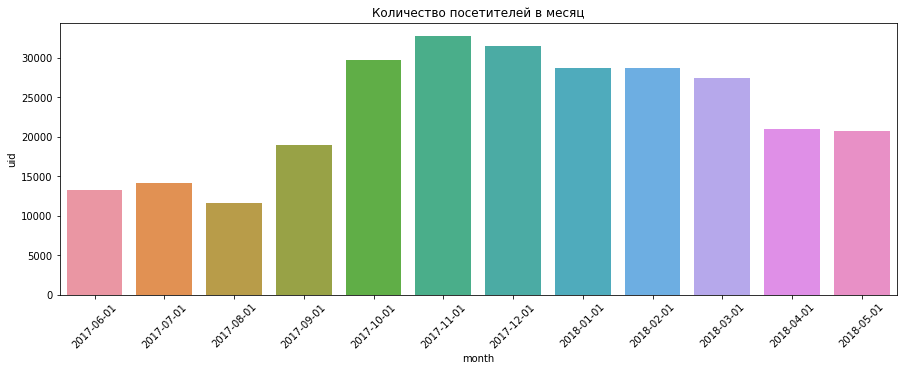

In [14]:
# Анализ показателя WAU
plt.figure(figsize=(15,5))
a=sns.barplot(data=MAU, x='month', y='uid')
plt.xticks(rotation= 45)
a.set_title('Количество посетителей в месяц')

In [15]:
print(MAU)
MAU.describe()

         month    uid
0   2017-06-01  13259
1   2017-07-01  14183
2   2017-08-01  11631
3   2017-09-01  18975
4   2017-10-01  29692
5   2017-11-01  32797
6   2017-12-01  31557
7   2018-01-01  28716
8   2018-02-01  28749
9   2018-03-01  27473
10  2018-04-01  21008
11  2018-05-01  20701


,uid
count,12.000000
mean,23228.416667
std,7546.380462
min,11631.000000
25%,17777.000000
50%,24240.500000
75%,28984.750000
max,32797.000000


Резкий рост посетителей можно отметить 2017-10-01. После 2017-11-01 происходит слабое медленное снижение. В средней за месяц около 23 000 - 24 000 посетителей.

Text(0.5, 1.0, 'Количество посетителей в неделю')

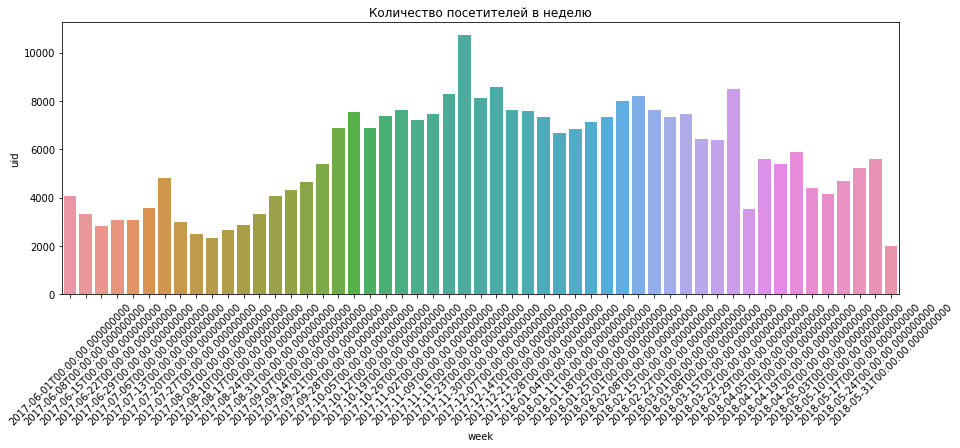

In [16]:
# Анализ показателя WAU
plt.figure(figsize=(15,5))
a=sns.barplot(data=WAU, x='week', y='uid')
plt.xticks(rotation= 45)
a.set_title('Количество посетителей в неделю')

In [17]:
WAU.describe()
display(WAU)

,week,uid
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055
5,2017-07-06,3563
6,2017-07-13,4790
7,2017-07-20,2978
8,2017-07-27,2505
9,2017-08-03,2343


Рост посетителей точнее виден по данному показателю. В средней за неделю около 5 700 - 5 800 посетителей.

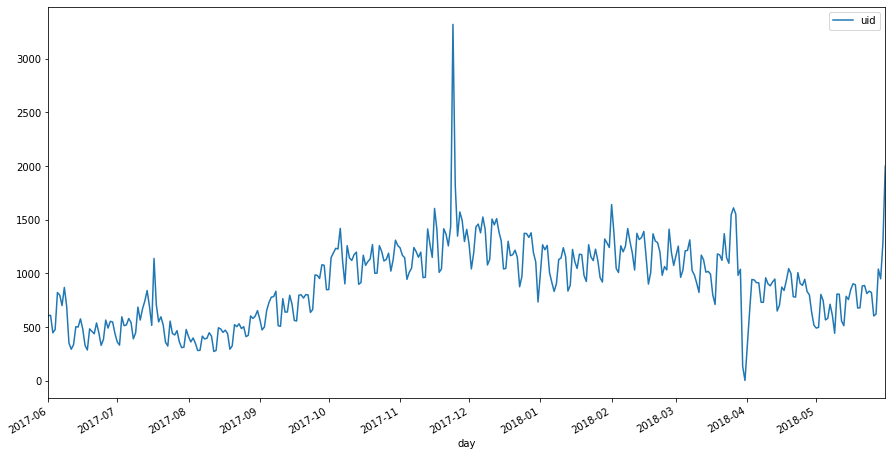

In [18]:
DAU.pivot_table(index='day', aggfunc=({'uid':'sum'})).plot(figsize=(15,8))
plt.show()

In [19]:
print(DAU.head())
DAU.describe()

         day  uid
0 2017-06-01  605
1 2017-06-02  608
2 2017-06-03  445
3 2017-06-04  476
4 2017-06-05  820


,uid
count,364.000000
mean,907.991758
std,370.513838
min,1.000000
25%,594.000000
50%,921.000000
75%,1173.000000
max,3319.000000


В средней за день около 907 - 921 посетителей.

Рассмотрел MAU, WAU, DAU с помощью графиков и метрик, по которым можно увидеть закономерность их роста и снижения с разной степенью конкретизации даты.

Сколько сессий в день?

In [20]:
# Количество сессий в день
visits_per_day=visits.groupby(['day']).agg({'uid': ['count']})
visits_per_day.columns = ['n_sessions']

In [21]:
# Среднее количество сессий в день
mean_visits_per_day=visits_per_day['n_sessions'].mean()
median_visits_per_day=visits_per_day['n_sessions'].median()
print('Среднее количество сессий в день равно', int(mean_visits_per_day), '-', int(median_visits_per_day))

Среднее количество сессий в день равно 987 - 1003


In [22]:
visits_per_day

,n_sessions
day,
2017-06-01,664
2017-06-02,658
2017-06-03,477
2017-06-04,510
2017-06-05,893
...,...
2018-05-27,672
2018-05-28,1156
2018-05-29,1035


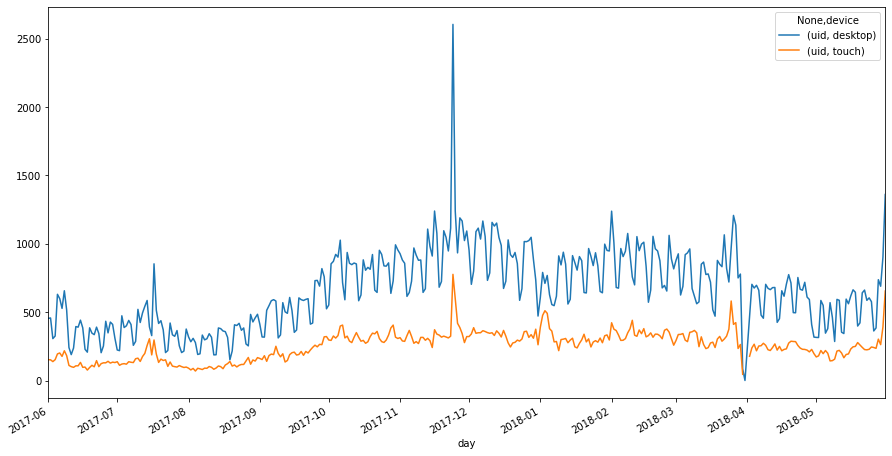

In [23]:
visits.pivot_table(index='day', columns='device', aggfunc=({'uid':'nunique'})).plot(figsize=(15,8))
plt.show()

Посчитал срееднее значение и медиану количества сессий клиентов для более точного понимания сколько обычно сессий в день. Средние показатели количества сессий в день только немного выше таких же показателей по количеству уникальных клиентов в день.

Сколько длится одна сессия?

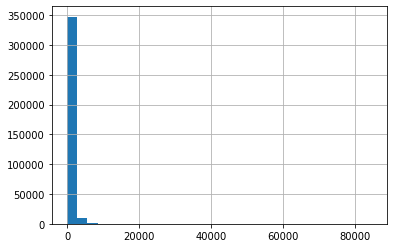

In [24]:
# Посмотрим распределение длительность сессий
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration'].hist(bins=30)

По данному распределению видно, что большая часть сессий чуть больше 0.

In [25]:
# Вычислим среднюю продолжительность сессии
mean_duration=visits['session_duration'].mean()
median_duration=visits['session_duration'].median()
print('Примерная средняя продолжительность сессии', int(median_duration),'-', int(mean_duration), 'секунд')

Примерная средняя продолжительность сессии 300 - 643 секунд


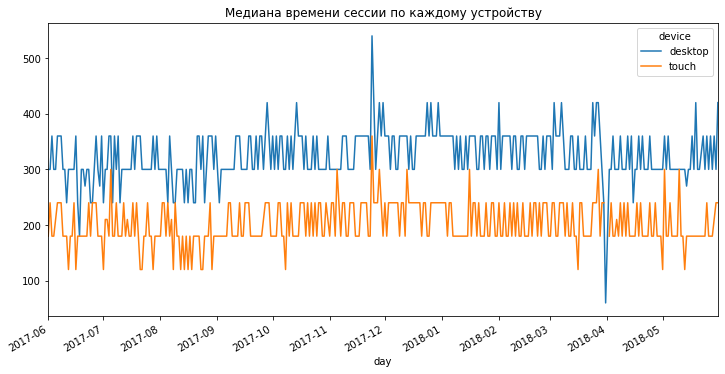

In [26]:
# Изменение медианы продолжительности сессии
visits.pivot_table(index='day', columns='device', 
                   values='session_duration', aggfunc='median').plot(figsize=(12,6))
plt.title('Медиана времени сессии по каждому устройству')
plt.show()

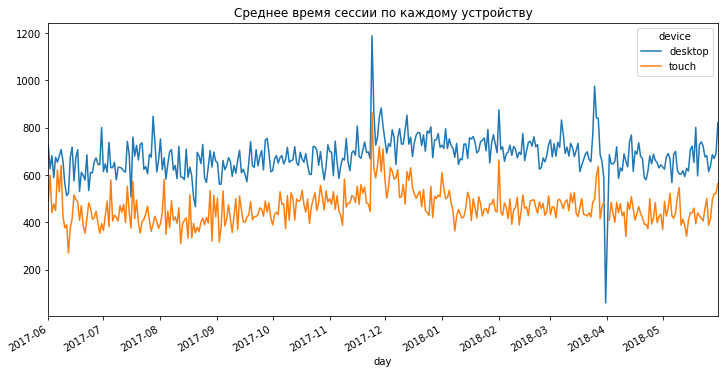

In [27]:
# Изменение среднего време сессии
visits.pivot_table(index='day', columns='device', 
                   values='session_duration', aggfunc='mean').plot(figsize=(12,6))
plt.title('Среднее время сессии по каждому устройству')
plt.show()

Посчитал среднее и медиану продолжительности сессии для более точного понимания сколько длиться сессия. На среднее сильно влияют статистические аномалии, поэтому нужна медианная оценка. 
По графику видно, что с desctop в среднем дольше сессии.

In [28]:
visits.head()

,device,end_ts,source_id,start_ts,uid,day,week,month,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0


Как часто люди возвращаются?

In [29]:
#Сформируем когорту - сгруппируем пользователей по дате первой покупки:
first_activity_date = visits.groupby('uid')['day'].min()
#переименуем Series
first_activity_date.name = 'first_activity_date'
#Объединим датафрейм `visits` и `first_activity_date` по столбцу 'uid':
visits = visits.join(first_activity_date,on='uid') 
#Когорту мы будем формировать помесячно. Выделим из столбцов `first_activity_date` и `session_date` месяцы (в формате первого дня месяца, а не номера месяца, чтобы не возникло пересечения по годам):
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['session_activity_month'] = visits['day'].astype('datetime64[M]')
#Теперь для каждой строки датафрейма можно рассчитать lifetime пользователя в рамках когорты (по месяцам):
visits['cohort_lifetime'] = visits['session_activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime']=round(visits['cohort_lifetime']).astype('int')
#Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определенный «месяц жизни»:
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts = cohorts.rename(columns={'uid':'users_count'})
display(cohorts.head())
#Найдём исходное количество пользователей в когорте. Возьмём их число на нулевую неделю:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','users_count']]
initial_users_count = initial_users_count.rename(columns={'users_count':'cohort_users'})
display(initial_users_count.head())
#Объединим данные по когортам с исходным количеством пользователей в когорте:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
display(cohorts.head())
#Рассчитаем Retention Rate (разделим количество активных пользователей в каждый месяц на исходное число пользователей в когорте):
cohorts['retention'] = cohorts['users_count']/cohorts['cohort_users'] 
cohorts['first_activity_month'] = cohorts['first_activity_month'].dt.date
display(cohorts.head())

,first_activity_month,cohort_lifetime,users_count
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


,first_activity_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


,first_activity_month,cohort_lifetime,users_count,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


,first_activity_month,cohort_lifetime,users_count,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


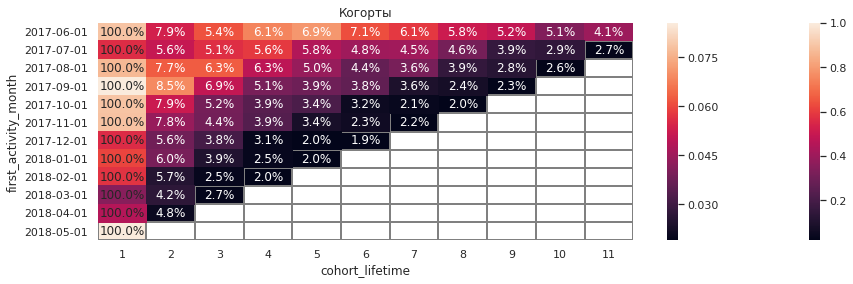

In [30]:
#Построим сводную таблицу:
retention_pivot = cohorts.\
    pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
sns.set(style='white')
plt.figure(figsize=(15,4))
plt.title('Когорты')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='grey');
sns.heatmap(retention_pivot.drop(columns=[0]))

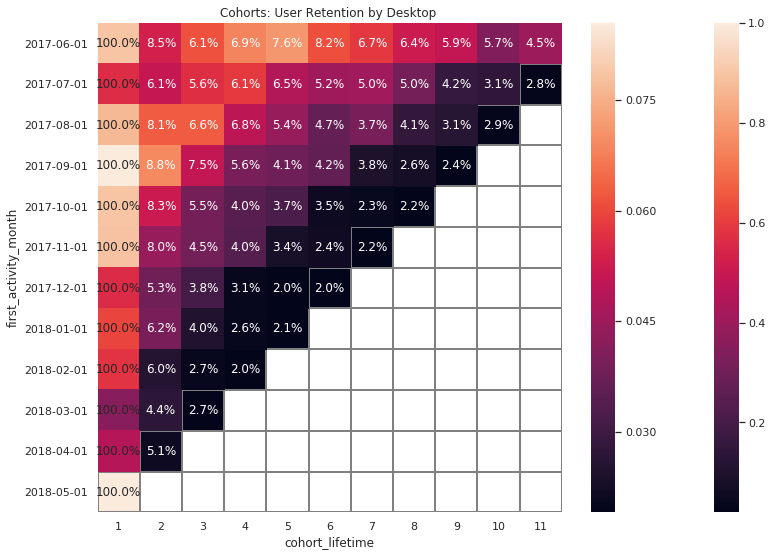

In [31]:
#Делаю по аналогии с расчетом общего retention по desktop. Считаю кол-во уникальных поьзователей в каждой когорте в каждом возрасте когорты
visits_desktop=visits.query('device in "desktop"').copy()
cohorts_desktop = visits_desktop.groupby(['device', 'first_activity_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()
#Считаем исходное число пользоватей в каждой когорте
initial_users_count_desktop = cohorts_desktop[cohorts_desktop['cohort_lifetime'] == 0][['device', 'first_activity_month', 'uid']]
initial_users_count_desktop = initial_users_count_desktop.rename(columns={'uid': 'initial_users'})
#соединяем таблички
cohorts_desktop = cohorts_desktop.merge(initial_users_count_desktop, on = 'first_activity_month')
#считаем retention
cohorts_desktop['retention'] = cohorts_desktop['uid'] / cohorts_desktop['initial_users']
#строим сводную таблицу
retention_pivot_desktop = (cohorts_desktop.pivot_table(index=['first_activity_month'],
                                          columns='cohort_lifetime',
                                          values='retention',
                                          aggfunc='sum'))
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention by Desktop ')
sns.heatmap(retention_pivot_desktop, annot=True, fmt='.1%', linewidths=1, linecolor='gray');
sns.heatmap(retention_pivot.drop(columns=[0]))

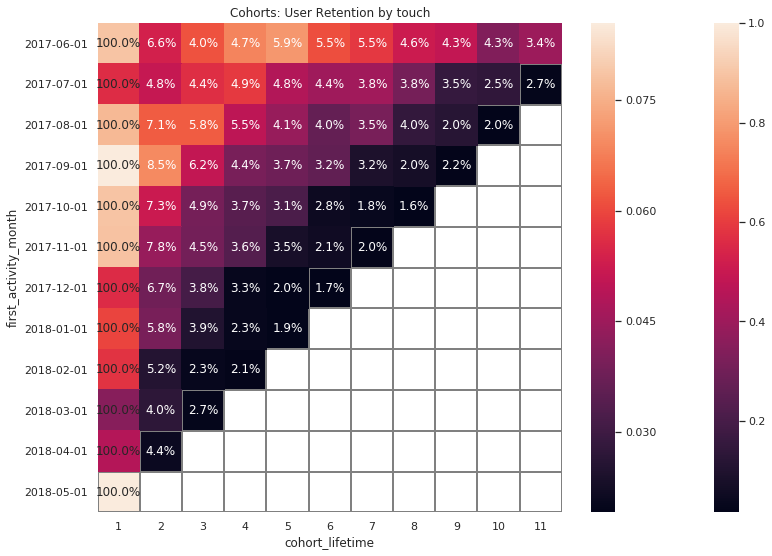

In [32]:
#Делаю по аналогии с расчетом общего retention по touch. Считаю кол-во уникальных поьзователей в каждой когорте в каждом возрасте когорты
visits_touch=visits.query('device in "touch"').copy()
cohorts_touch = visits_touch.groupby(['device', 'first_activity_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()
#Считаем исходное число пользоватей в каждой когорте
initial_users_count_touch = cohorts_touch[cohorts_touch['cohort_lifetime'] == 0][['device', 'first_activity_month', 'uid']]
initial_users_count_touch = initial_users_count_touch.rename(columns={'uid': 'initial_users'})
#соединяем таблички
cohorts_touch = cohorts_touch.merge(initial_users_count_touch, on = 'first_activity_month')
#считаем retention
cohorts_touch['retention'] = cohorts_touch['uid'] / cohorts_touch['initial_users']
#строим сводную таблицу
retention_pivot_touch = (cohorts_touch.pivot_table(index=['first_activity_month'],
                                          columns='cohort_lifetime',
                                          values='retention',
                                          aggfunc='sum'))
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention by touch')
sns.heatmap(retention_pivot_touch, annot=True, fmt='.1%', linewidths=1, linecolor='gray');
sns.heatmap(retention_pivot.drop(columns=[0]))

### Выводы по продукту

В среднем за день около 907 - 921 посетителей. Среднее количество сессий в день равно 987 - 1003. Примерная средняя продолжительность сессии 300 - 643 секунд. Люди чаще возвращались в первые месяцы. Также показатели возвращаемости клиентов выше у тех, кто использует Desktop, а не Touch.

- Какие проблемные точки мы выявели? Каков их причина? Как можно на это повлиять?
После первого месяца кол-во посетителей когорты значительно сокращается до 4-8%. Это возможно связанно с тем, что клиент скорее всего удовлетворил свои потребности в первый месяц и больше не интересуется услугами, которые предоставляет Яндекс. Афиша, либо ему не понравился сервис. Повлиять на это возможно если напоминать покупателям о услугах после первого месяца. 

- Что мы можем сказать по посещаемости? В какие месяцы она выше, а в какие ниже? Почему? Как можно привлечь людей в месяца с низкой посещаемостью?
Заметное снижение возвращения клиентов можно отметить после новогодних праздников. Высокие показатели retention rate перед Новым Годом связаны с подготовкой людей к нему, после которого люди имеют меньше стимулов заходить на сайт Афиши. Возможно дополнительные стимулирующие акции для клиентов после Нового Года могут позволить оставить показатели на уровне довогоднего. 

- Какова продолжительность сесии? Большинство сессий менее минуты? Это нормально или проблема? Почему так происходит? Как можно на это повлиять?
Примерная средняя продолжительность сессии 300 - 643 секунд. То есть большинство сессий весьма короткая. Возможно это свяазано с тем, что посетители, переходя на сайт Афиши для покупки или ознакомления, не тратят время на более детальное ознакомление с услугами Афиши. Это является проблемой, с которой можно справиться более точно подобранными рекомендациями для посетителей, чтобы они тратили больше времени на сайте для новых покупок. 

- Максимальный retention 8.5% - это нормально или мало? Почему так происходит? как это поправить?
Максимальный показатель в 8,5% является низким. Возможно это связано с тем, что клиентам не понравились услуги Афиши, и они пользуются сайтами конкурентов. Или Афиша не достаточно хорошо привлекает покупателей к дополнительным покупкам, из-за которых они будут еще раз заходить на сайт. Поправить ситуацию можно повышением качества услуг и маркетинга.

### Продажи

Когда люди начинают покупать?

In [33]:
# Посчитаем когда в первый раз пришел каждый посетитель
first_visits = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid') \
                     .agg({'start_ts' : 'first', 'source_id': 'first', 'device': 'first'})
first_orders = orders.sort_values(by = ['uid', 'buy_ts']).groupby('uid') \
                     .agg({'buy_ts' : 'first'})
report = first_visits.merge(first_orders, on = 'uid')

# Посчитаем метрики показателя, когда клиенты начинают покупать
report['delta'] = (report['buy_ts'] - report['start_ts']).dt.total_seconds() / 60 / 60
report.query('delta > 0')[['delta']].describe().T

,count,mean,std,min,25%,50%,75%,max
delta,34068.0,434.902862,1164.297905,0.016667,0.083333,0.35,73.966667,8719.066667


Люди начинают покупать чаще всего через 20 минут

Сколько раз покупают за период?

In [34]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [35]:
# создаем столбец с датой первой покупки в таблице orders
first_order_date_by_customers = orders.groupby('uid')['buy_ts'].min()
first_order_date_by_customers.name = 'first_order_date'
orders = orders.join(first_order_date_by_customers,on='uid')

# Приводим показатели в более удобный формат
orders['order_month']=orders['buy_ts'].astype('datetime64[M]')
orders['order_day']=orders['buy_ts'].astype('datetime64[D]')
orders['order_week']=orders['buy_ts'].astype('datetime64[W]')

In [36]:
# Посчитаем общий доход по каждому клиенту
revenue_by_uid=orders.pivot_table(index='uid',values='revenue',aggfunc='sum')
revenue_by_uid

,revenue
uid,
313578113262317,0.55
1575281904278712,3.05
2429014661409475,73.33
2464366381792757,2.44
2551852515556206,10.99
...,...
18445147675727495770,3.05
18445407535914413204,0.88
18445601152732270159,4.22


In [37]:
mean_orders=orders.pivot_table(index='order_month',values='uid',aggfunc=('count', 'nunique'))
mean_orders['mean']=mean_orders['count']/mean_orders['nunique']
mean_orders

,count,nunique,mean
order_month,,,
2017-06-01,2354,2023,1.163618
2017-07-01,2363,1984,1.191028
2017-08-01,1807,1472,1.227582
2017-09-01,3387,2750,1.231636
2017-10-01,5679,4675,1.214759
2017-11-01,5659,4547,1.244557
2017-12-01,6218,4942,1.258195
2018-01-01,4721,3898,1.211134
2018-02-01,5281,4258,1.240254


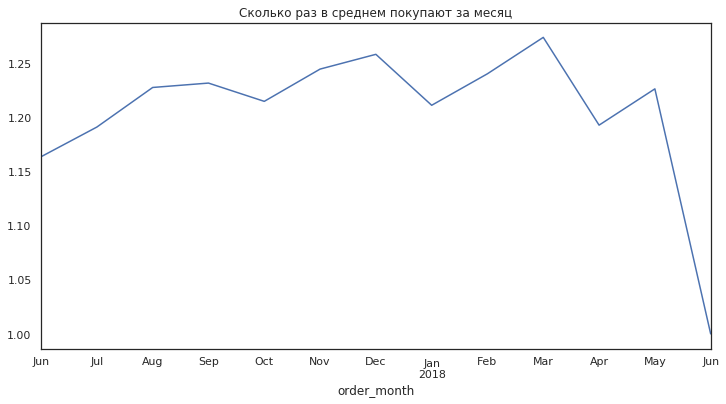

In [38]:
mean_orders['mean'].plot(figsize=(12,6))
plt.title('Сколько раз в среднем покупают за месяц')
plt.show()

Сделал таблицу и график, в которых отобразил сколько раз в среднем покупают за месяц. Для этого посчитал общую сумму дохода по месяцам и количество покупок. Данный показатель медленно растет за весь период наблюдений. Последний месяц является статистическим выбросом и не должен влиять на выводы.

In [39]:
mean_orders_week=orders.pivot_table(index='order_week',values='uid',aggfunc=('count', 'nunique'))
mean_orders_week['mean']=mean_orders_week['count']/mean_orders_week['nunique']
mean_orders_week.head()

,count,nunique,mean
order_week,,,
2017-06-01,896,774,1.157623
2017-06-08,525,478,1.098326
2017-06-15,341,310,1.100000
2017-06-22,441,396,1.113636
2017-06-29,461,416,1.108173


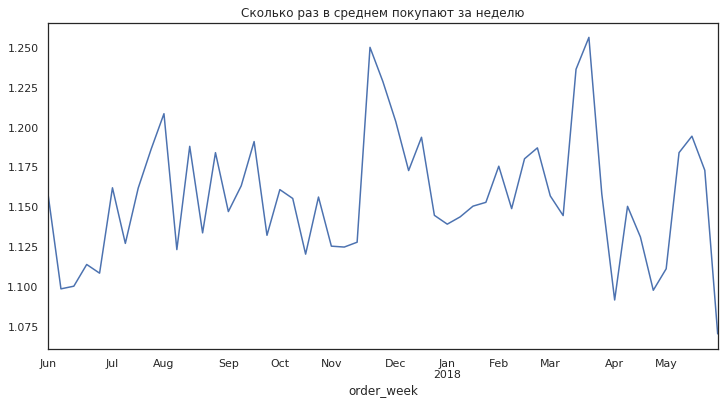

In [40]:
mean_orders_week['mean'].plot(figsize=(12,6))
plt.title('Сколько раз в среднем покупают за неделю')
plt.show()

Сделал таблицу и график, в которых отобразил сколько раз в среднем покупают за неделю. Данный показатель имеет тенденцию к повышению. Но теперь он сильнее "скачет" в зависимости от времени. Для его подсчета я нашел общую сумму дохода по неделям и количество покупок. Последняя неделя является статистическим выбросом и не должна влиять на выводы.

In [41]:
mean_orders_day=orders.pivot_table(index='order_day',values='uid',aggfunc=('count', 'nunique'))
mean_orders_day['mean']=mean_orders_day['count']/mean_orders_day['nunique']
mean_orders_day.head()

,count,nunique,mean
order_day,,,
2017-06-01,96,86,1.116279
2017-06-02,111,101,1.099010
2017-06-03,67,61,1.098361
2017-06-04,66,59,1.118644
2017-06-05,161,146,1.102740


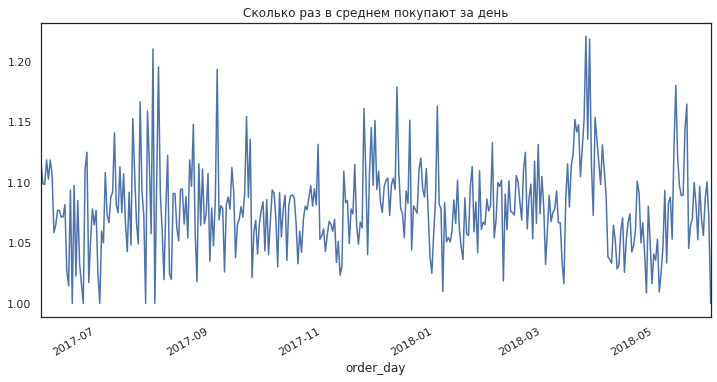

In [42]:
mean_orders_day['mean'].plot(figsize=(12,6))
plt.title('Сколько раз в среднем покупают за день')
plt.show()

Сделал таблицу и график, в которых отобразил сколько раз в среднем покупают за день. Для его подсчета я нашел общую сумму дохода по дням и количество покупок.

Судя по всем графикам и таблицам, можно сделать выбор что клиенты чаще всего делают одну покупку.

Какой средний чек?

In [43]:
mean_orders['mean_revenue']=orders.pivot_table(index='order_month',values='revenue',aggfunc=('mean'))
mean_orders

,count,nunique,mean,mean_revenue
order_month,,,,
2017-06-01,2354,2023,1.163618,4.060106
2017-07-01,2363,1984,1.191028,5.306589
2017-08-01,1807,1472,1.227582,4.847139
2017-09-01,3387,2750,1.231636,5.416448
2017-10-01,5679,4675,1.214759,4.928280
2017-11-01,5659,4547,1.244557,4.783518
2017-12-01,6218,4942,1.258195,5.852139
2018-01-01,4721,3898,1.211134,4.112927
2018-02-01,5281,4258,1.240254,4.840095


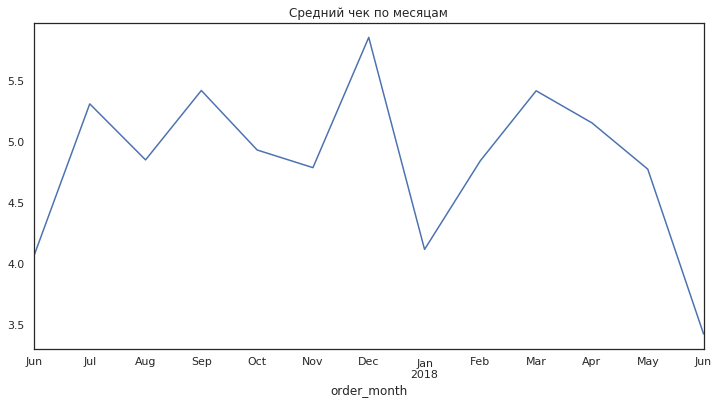

In [44]:
mean_orders['mean_revenue'].plot(figsize=(12,6))
plt.title('Средний чек по месяцам')
plt.show()

Сделал таблицу и график, в которых отобразил средний чек по месяцам. В декабре был самый высокий показатель по среднему размеру чека. В январе был резкое снижение, которые скорее всего связано с новым годом.

Сколько денег приносят? (LTV)

In [45]:
orders.head()

,buy_ts,revenue,uid,first_order_date,order_month,order_day,order_week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01


In [46]:
orders['first_order_date']=orders['first_order_date'].astype('datetime64[M]').dt.date

In [47]:
# Кол-во покупателей для когорты
cohort_sizes = orders.groupby('first_order_date').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [48]:
# объем и количество продаж
cohorts = orders.groupby(['first_order_date','order_month']).agg({'revenue': ('sum', 'count')}).reset_index()
cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'count']
cohorts

,first_order_month,order_month,revenue,count
0,2017-06-01,2017-06-01,9557.49,2354
1,2017-06-01,2017-07-01,981.82,177
2,2017-06-01,2017-08-01,885.34,174
3,2017-06-01,2017-09-01,1931.30,226
4,2017-06-01,2017-10-01,2068.58,292
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,176
75,2018-04-01,2018-04-01,10600.69,2495
76,2018-04-01,2018-05-01,1209.92,195
77,2018-05-01,2018-05-01,13925.76,3249


In [49]:
# Объединяем таблицы
ltv_by_user = pd.merge(cohort_sizes, cohorts, on='first_order_month')
print(ltv_by_user)
# выручка и кол-во заказов для каждого покупателя
uid_sizes = orders.groupby('uid').agg({'revenue': ('sum', 'count')}).reset_index()
uid_sizes

   first_order_month  n_buyers order_month   revenue  count
0         2017-06-01      2023  2017-06-01   9557.49   2354
1         2017-06-01      2023  2017-07-01    981.82    177
2         2017-06-01      2023  2017-08-01    885.34    174
3         2017-06-01      2023  2017-09-01   1931.30    226
4         2017-06-01      2023  2017-10-01   2068.58    292
..               ...       ...         ...       ...    ...
74        2018-03-01      3533  2018-05-01   1114.87    176
75        2018-04-01      2276  2018-04-01  10600.69   2495
76        2018-04-01      2276  2018-05-01   1209.92    195
77        2018-05-01      2988  2018-05-01  13925.76   3249
78        2018-06-01         1  2018-06-01      3.42      1

[79 rows x 5 columns]


uid revenue      
                                sum count
0           313578113262317    0.55     1
1          1575281904278712    3.05     2
2          2429014661409475   73.33     1
3          2464366381792757    2.44     1
4          2551852515556206   10.99     2
...                     ...     ...   ...
36518  18445147675727495770    3.05     1
36519  18445407535914413204    0.88     3
36520  18445601152732270159    4.22     1
36521  18446156210226471712    9.78     1
36522  18446167067214817906    7.94     1

[36523 rows x 3 columns]

Узнал общий доход и количество покупок для каждой когорты, ее возрасту и для каждого покупателя.

In [50]:
# Узнал типы данных
ltv_by_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 5 columns):
first_order_month    79 non-null object
n_buyers             79 non-null int64
order_month          79 non-null datetime64[ns]
revenue              79 non-null float64
count                79 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.7+ KB


In [51]:
# Суммарная выручка и кол-во заказов для каждой когорты и ее возраста
ltv_by_user['first_order_month']=ltv_by_user['first_order_month'].astype('datetime64[M]')
ltv_by_user['age'] = (ltv_by_user['order_month'] - ltv_by_user['first_order_month']) / np.timedelta64(1, 'M')
ltv_by_user['age'] = ltv_by_user['age'].round().astype('int')
ltv_by_user['ltv'] = ltv_by_user['revenue'] / ltv_by_user['n_buyers']
ltv_by_user

,first_order_month,n_buyers,order_month,revenue,count,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,2354,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,177,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,174,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,226,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,292,4,1.022531
...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,176,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,2495,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,195,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,3249,0,4.660562


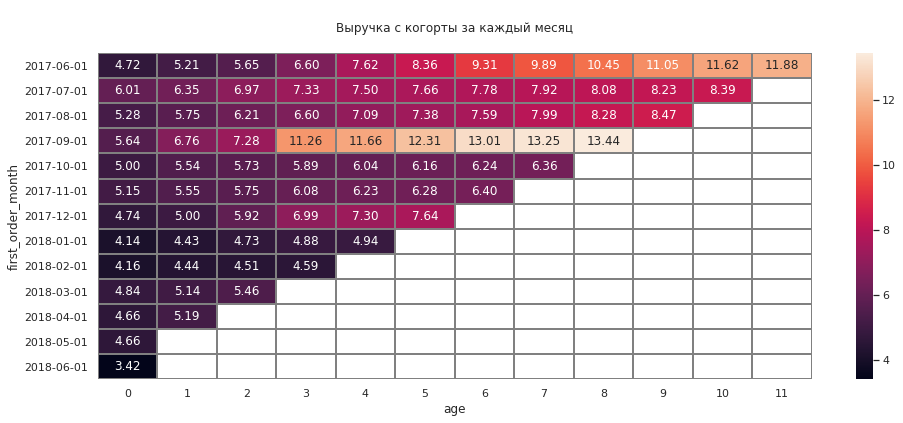

In [52]:
ltv_by_user['first_order_month'] = ltv_by_user['first_order_month'].astype('datetime64[M]').dt.date
ltv_by_user['order_month'] = ltv_by_user['order_month'].astype('datetime64[M]').dt.date

ltv_by_user_pivot = ltv_by_user.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').cumsum(axis=1)
    
plt.figure(figsize=(16, 6))
 
sns.heatmap(ltv_by_user_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.title("\n" + 'Выручка с когорты за каждый месяц' + "\n")
plt.show()

Для анализа доходности и LTV каждой когорты необходимо было посчитать объем и кол-во продаж по возрасту каждой когорты. На таблице можно отследить рост показателя LTV для каждой когорты по ее возрасту. Из нее видно, что когорта 2017-09-01 и 2017-06-01 принесли больше всего дохода за все время.


### Вывод по продажам

Люди начинают покупать чаще всего через 20 минут. Когорты 2017-09-01 и 2017-06-01 принесли больше всего дохода за все время. Для этого узнал сколько принес денег каждый покупатель и сколько раз он покупал. А также как были распределены доходы по месяцам у каждой когорты.

Типичный клиент покупает 1-2 раза и тратит сравнительно маленькую сумму в 5-7 у.е. Для улучшения данного показателя лучшу, на мой взгляд, стремиться к увеличению кол-ва покупок клиентов, частоту обращения к сайту.
В летнии месяцы клиенты не так часто обращаются за покупками на сайте, чем в осенние месяцы из-за частых отпусков и каникул. многие люди уезжают в места, где они не нуждаются в услугах Афиши (деревня, отечественные или зарубежные курорты и т.д.). Осенью люди возвращаются в большие города, где чаще используют Афишу. Для повышения уровня продаж летом можно посоветовать расширение услуг в местах, куда люди путешествуют во время отпусков и каникул.
Снижение продаж после Нового Года связаны с большими тратами в предногодние месяцы. Повышение продаж возможно снижением цен услуг.

### Маркетинг
Сколько денег потратили? Всего / на каждый источник / по времени

In [53]:
# Создадим новую сводную таблицу по издержкам
costs_new = pd.read_csv('costs.csv')
costs_new.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [54]:
# всего затрат
all_costs=costs_new['costs'].sum()
print('Всего затрат', all_costs)

Всего затрат 329131.62


In [55]:
# Затраты по источнику
source_costs=costs_new.pivot_table(index='source_id', values='costs', aggfunc='sum')
source_costs

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Посчитал общее кол-во затрат за все время. По кол-ву затрат по источникам можно выделить 3 источник как самый большой. меньше всего было потрачено на 9 и 10 источник.

In [56]:
# Добавляем месяц
costs_new['month']=costs_new['dt'].astype('datetime64[M]')

# Затраты по месяцу
month_costs=costs_new.pivot_table(index='month', values='costs', aggfunc='sum')
month_costs

,costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


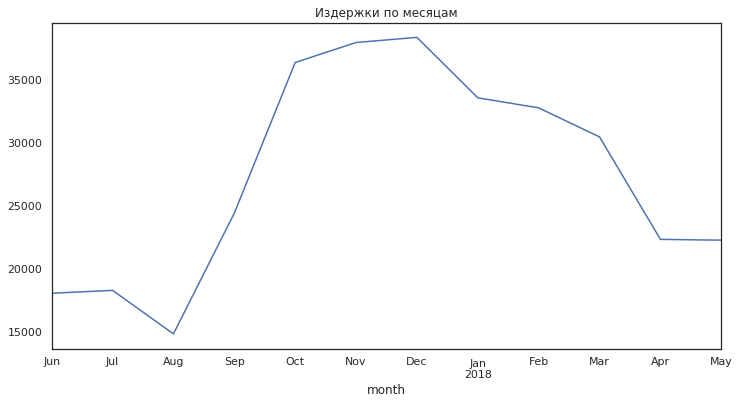

In [57]:
month_costs['costs'].plot(x='month', figsize=(12,6))
plt.title('Издержки по месяцам')
plt.show()

Издержки резко увеличились после сентября и после января начали снижаться.

In [58]:
#затраты по месяцам и источникам
costs_new.pivot_table(index='month', 
                      columns='source_id', 
                      values='costs', 
                      aggfunc='sum')

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


Создал таблицу, по которой можно узнать распределение издержек по месяцам и источникам.

Сколько стоило привлечение одного покупателя из каждого источника?

In [59]:
# Откуда пришел покупатель
first_source_for_uid=visits.sort_values(by=['uid', 'source_id']).groupby('uid').agg({'source_id':'first'}).reset_index()

In [60]:
orders = orders.merge(first_source_for_uid, on='uid')
orders.head()

,buy_ts,revenue,uid,first_order_date,order_month,order_day,order_week,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,3


In [61]:
source_uid_count=orders.pivot_table(index='source_id', values='uid', aggfunc='nunique')
source_uid_count

,source_id,uid
source_id,,
1,1,7138
2,1,5336
3,1,9619
4,1,8138
5,1,4879
7,1,1
9,1,527
10,1,885


Узнал сколько уникальных покупателей пришло из каждого источника

In [62]:
# Создал таблицу с издержками и кол-ву покупателей по источнику
source_costs = source_costs.merge(source_uid_count['uid'], on='source_id')
source_costs

,costs,uid
source_id,,
1,20833.27,7138
2,42806.04,5336
3,141321.63,9619
4,61073.60,8138
5,51757.10,4879
9,5517.49,527
10,5822.49,885


In [63]:
source_costs['costs_per_uid']=source_costs['costs']/source_costs['uid']
source_costs['costs_per_uid'].reset_index()

,source_id,costs_per_uid
0,1,2.918642
1,2,8.022121
2,3,14.691925
3,4,7.504743
4,5,10.608137
5,9,10.469620
6,10,6.579085


Больше всего пришлось потратить на привлечение покупателей из 3, 5 и 9 источника. Самый низкий показатель у 1 источника.

На сколько окупились расходы? (ROI)

In [64]:
# Произвел изменения в таблицах для более удобной работы далее
ltv_by_user['month']=ltv_by_user['first_order_month'].astype('datetime64[M]')
month_costs=month_costs.reset_index()
initial_users_count['month']=initial_users_count['first_activity_month']

In [65]:
# Соединил балицы по издержкам по месяцу и кол-ву пользователей по месяцам
users_cac=pd.merge(month_costs,initial_users_count, on='month')
users_cac

,month,costs,first_activity_month,cohort_users
0,2017-06-01,18015.00,2017-06-01,13259
1,2017-07-01,18240.59,2017-07-01,13140
2,2017-08-01,14790.54,2017-08-01,10181
3,2017-09-01,24368.91,2017-09-01,16704
4,2017-10-01,36322.88,2017-10-01,25977
5,2017-11-01,37907.88,2017-11-01,27248
6,2017-12-01,38315.35,2017-12-01,25268
7,2018-01-01,33518.52,2018-01-01,22624
8,2018-02-01,32723.03,2018-02-01,22197
9,2018-03-01,30415.27,2018-03-01,20589


In [66]:
# Посчитаем издержки на одного покупателя по месяцам
users_cac['cac']=users_cac['costs']/users_cac['cohort_users']
users_cac.drop(['first_activity_month'], axis='columns', inplace=True)
users_cac

,month,costs,cohort_users,cac
0,2017-06-01,18015.00,13259,1.358700
1,2017-07-01,18240.59,13140,1.388173
2,2017-08-01,14790.54,10181,1.452759
3,2017-09-01,24368.91,16704,1.458867
4,2017-10-01,36322.88,25977,1.398271
5,2017-11-01,37907.88,27248,1.391217
6,2017-12-01,38315.35,25268,1.516359
7,2018-01-01,33518.52,22624,1.481547
8,2018-02-01,32723.03,22197,1.474210
9,2018-03-01,30415.27,20589,1.477258


Roi по когорте и девайсу

In [67]:
first_visits = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid') \
                     .agg({'start_ts' : 'first', 'source_id': 'first', 'device': 'first'}).reset_index()

In [68]:
first_visits

,uid,start_ts,source_id,device
0,11863502262781,2018-03-01 17:27:00,3,touch
1,49537067089222,2018-02-06 15:55:00,2,touch
2,297729379853735,2017-06-07 18:47:00,3,desktop
3,313578113262317,2017-09-18 22:49:00,2,desktop
4,325320750514679,2017-09-30 14:29:00,5,desktop
...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,5,desktop
228165,18446424184725333426,2017-12-06 20:32:00,4,touch
228166,18446556406699109058,2018-01-01 16:29:00,3,touch
228167,18446621818809592527,2017-12-27 13:27:00,4,desktop


Создал таблицу где можно узнать когда пришел покупатель, через какой источник и каким девайсом он пользуется.

In [69]:
revenue_by_uid=orders.pivot_table(index='uid',values='revenue',aggfunc='sum').reset_index()

In [70]:
revenue_by_uid

,uid,revenue
0,313578113262317,0.55
1,1575281904278712,3.05
2,2429014661409475,73.33
3,2464366381792757,2.44
4,2551852515556206,10.99
...,...,...
36518,18445147675727495770,3.05
36519,18445407535914413204,0.88
36520,18445601152732270159,4.22
36521,18446156210226471712,9.78


Создал таблицу с информацией сколько принесс каждый покупатель.

In [71]:
revenue_by_uid_device=revenue_by_uid.merge(first_visits, on='uid')
revenue_by_uid_device['start_ts']=revenue_by_uid_device['start_ts'].astype('datetime64[M]')

In [72]:
revenue_by_uid_device

,uid,revenue,start_ts,source_id,device
0,313578113262317,0.55,2017-09-01,2,desktop
1,1575281904278712,3.05,2017-06-01,10,touch
2,2429014661409475,73.33,2017-10-01,3,desktop
3,2464366381792757,2.44,2018-01-01,5,desktop
4,2551852515556206,10.99,2017-11-01,5,desktop
...,...,...,...,...,...
36518,18445147675727495770,3.05,2017-08-01,5,touch
36519,18445407535914413204,0.88,2017-09-01,3,desktop
36520,18445601152732270159,4.22,2017-08-01,2,desktop
36521,18446156210226471712,9.78,2017-11-01,3,desktop


Объединил таблицы. Теперь есть общая информация по каждому покупателю по доходу, первому месяцу, источнику и девайсу по каждому покупателю.

In [73]:
# Доход по источнику
source_id_data=revenue_by_uid_device.pivot_table(index='source_id',values='revenue',aggfunc=('sum'))
source_id_data

,revenue
source_id,
1,31090.55
2,46923.61
3,54511.24
4,56696.83
5,52624.02
7,1.22
9,5759.40
10,4450.33


In [74]:
# Доход по девайсу
device_data=revenue_by_uid_device.pivot_table(index='device',values='revenue',aggfunc=('sum'))
device_data

,revenue
device,
desktop,211329.77
touch,40727.43


In [75]:
# Доход и расзоды по источнику
source_id_data=source_id_data.merge(source_costs['costs'], on='source_id')

In [76]:
source_id_data

,revenue,costs
source_id,,
1,31090.55,20833.27
2,46923.61,42806.04
3,54511.24,141321.63
4,56696.83,61073.60
5,52624.02,51757.10
9,5759.40,5517.49
10,4450.33,5822.49


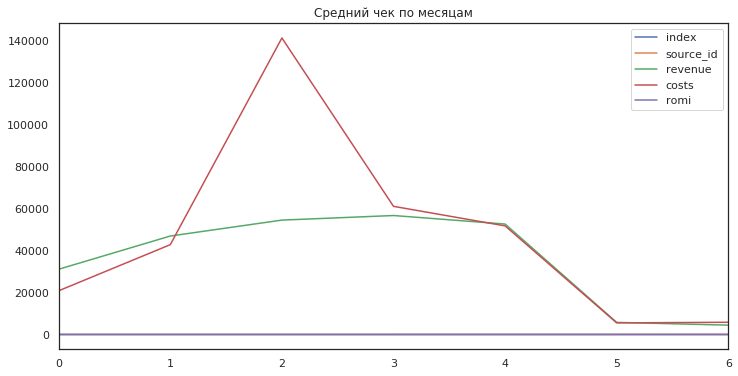

In [118]:
source_id_data.reset_index().plot(figsize=(12,6), )
plt.title('Средний чек по месяцам')
plt.show()

Наиболее прибыльными источниками являются источники 1 и 2. Источник номер 3 нименее выгодный. Остальные источники не так интересны в плане прибыльности как 1 и 2.

In [113]:
# Посчитал romi
source_id_data['romi']=source_id_data['revenue']/source_id_data['costs']

In [83]:
source_id_data=source_id_data.reset_index()

In [114]:
source_id_data

,source_id,revenue,costs,romi
0,1,31090.55,20833.27,1.492351
1,2,46923.61,42806.04,1.096191
2,3,54511.24,141321.63,0.385725
3,4,56696.83,61073.60,0.928336
4,5,52624.02,51757.10,1.016750
5,9,5759.40,5517.49,1.043844
6,10,4450.33,5822.49,0.764335


Text(0.5, 1.0, 'ROMI')

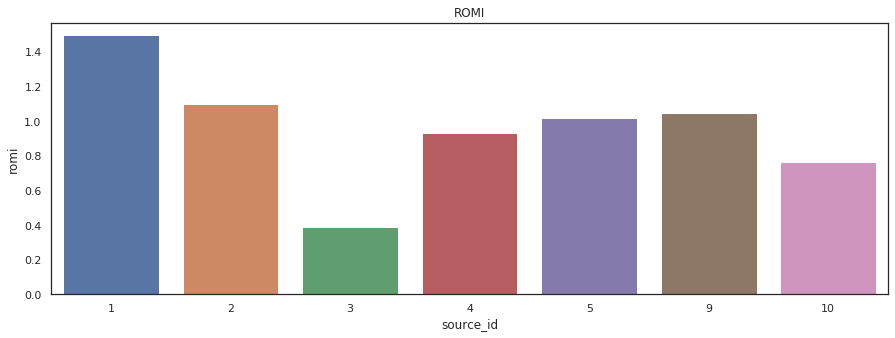

In [115]:
plt.figure(figsize=(15,5))
a=sns.barplot(data=source_id_data, x='source_id', y='romi')
a.set_title('ROMI')

Опираясь на анализе ROMI можно прийти к выводу, что источники клиентов 1 и 2 самые привлекательные, так как самые высокие. Источники 3, 4 и 10 не окупают себя. Источники 5 и 9 только окуают себя, не принося ощутимой прибыли.

In [80]:
# Доход по источнику и девайсу
revenue_by_device_source=revenue_by_uid_device.pivot_table(index='device', columns='source_id', values='revenue',aggfunc=('sum'))
revenue_by_device_source

source_id,1,2,3,4,5,7,9,10
device,,,,,,,,
desktop,25995.60,40386.63,46273.75,43414.96,46825.34,1.22,4866.41,3565.86
touch,5094.95,6536.98,8237.49,13281.87,5798.68,NaN,892.99,884.47


Большая часть покупателей и выручки приходило от пользователей desktop.

### Шаг 3. Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?

1 и 2 источник приносили много пользователей и быстро окупались. 3, 4, 9 и 10 не окупались - в них ничего вкладывать не нужно. 5-й окупался, но медленно. Т.е. рекламный бюджет следует делить между 1 и 2 источниками. Большая часть покупателей и выручки приходило от пользователей desktop, поэтому стоило бы уделить данному девайсу основное внимание.

### Шаг 4. Общий вывод

В начале работы обработал изначальные датасеты. Изменил формат записи числовых календарных данных.
Посчитал выручку по каждой игре во всех регионе.

Визулизировал данные с помощью графиков и гистограм.

Проанализировал выручку и издержки по когортам, источникам привлечения пользователей и ипользующимся девайсам.

Необходимо стимулировать покупателей снова заходить на сайт для новых покупок особенно после Нового Года, так как многие забывают о сайте и не заходят. Следует расширить географию предоставления услуг в местах, где люди проводят летние отпуска и каникулы. Снизить издержки на такие источники посетителей как 3, 4, 5, 9 и 10  и сосредоточить внимание на 1 и 2 источнике. 
Такими способами можно оптимизировать издержки на маркетинг, увеличить доход и возвращаемость клиентов.